In [1]:
# dataset from https://www.kaggle.com/datasets/mathurinache/digital-peter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def file_to_list(dir_path):
    '''
    Read all files in a folder.
    Return their content as a list of strings.
    '''
    text = []
    for file_name in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file_name)
        if os.path.isfile(file_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    line = f.readlines()
                    text.extend(line)
            except Exception as e:
                print(f'File read error {file_name}: {e}')
    return text

In [3]:
dir_path = 'words'
texts = file_to_list(dir_path)

In [4]:
print(f'Number of data: {len(texts)}')

Number of data: 9694


In [5]:
# create dataframe and add new columns
df = pd.DataFrame(texts, columns=['text'])
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(' ')))

In [6]:
print(df)

                                             text  char_count  word_count
0                                               +           1           1
1                катеринушка друг мой здравъствуй          32           4
2                   благодарствую зело за пърезен          29           4
3                  тъ полпива понеже у нас такова          30           6
4               нѣт грамотку iлиничнину чел медвѣ          33           5
...                                           ...         ...         ...
9689     без въсякия пошшады казнит смертью + а е          40           8
9690             жели хто пощадит тот сам тою каз          32           7
9691  нью кажнен будет i для того надобно iзяснит          43           8
9692           iменно iнтересы государтвенныя для          34           4
9693              вырасумления людем а портикуляр          31           4

[9694 rows x 3 columns]


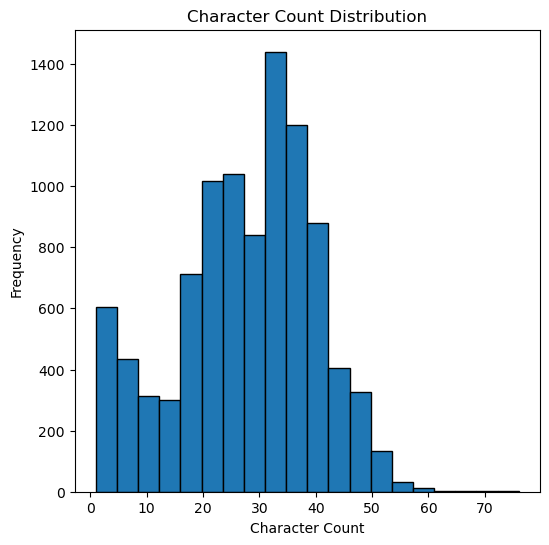

In [7]:
# plot graphs
plt.figure(figsize=(6, 6))
plt.hist(df['char_count'], bins=20, edgecolor='black')
plt.title('Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

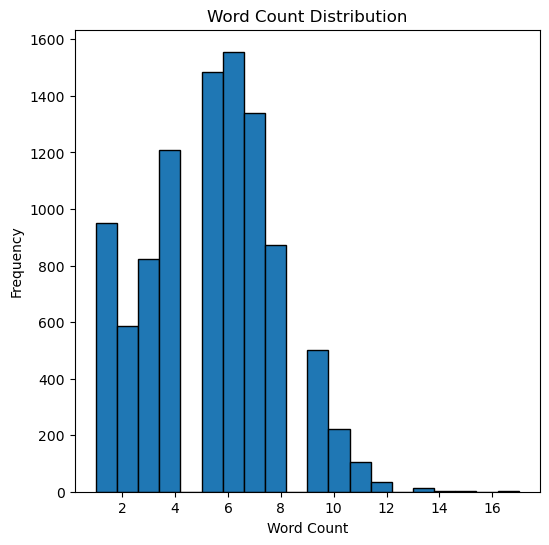

In [8]:
plt.figure(figsize=(6, 6))
plt.hist(df['word_count'], bins=20, edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

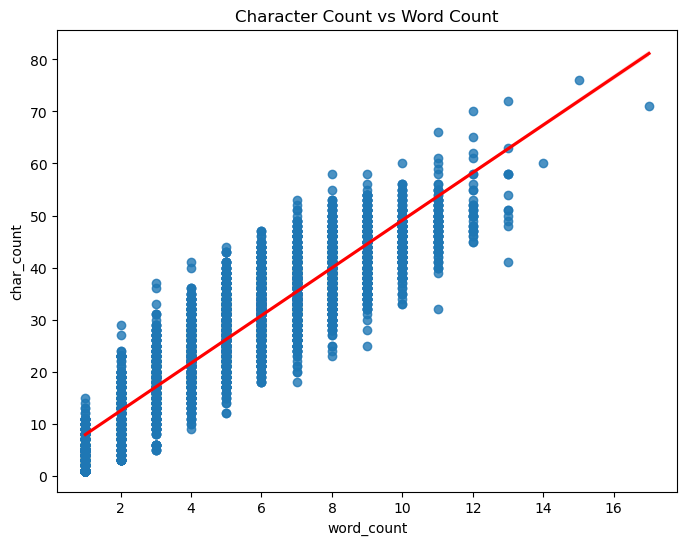

In [9]:
plt.figure(figsize=(8, 6))
sns.regplot(x='word_count', y='char_count', data=df, line_kws={'color': 'red'})
plt.title('Character Count vs Word Count')
plt.show()

In [10]:
text = ''.join(texts)
chars = pd.Series(list(text)).value_counts()
words = pd.Series(text.split()).value_counts()

In [11]:
print(f'Number of unique characters: {len(chars)}')
print(f'Number of unique words: {len(words)}')

Number of unique characters: 76
Number of unique words: 14710


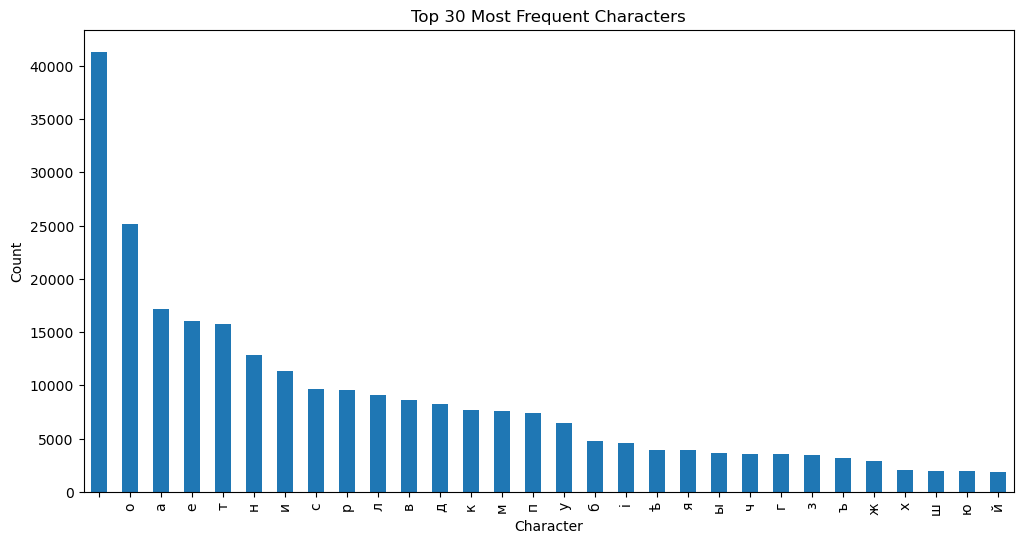

In [12]:
nchar = 30
plt.figure(figsize=(12, 6))
chars.head(nchar).plot(kind='bar')
plt.title(f'Top {nchar} Most Frequent Characters')
plt.xlabel('Character')
plt.ylabel('Count')
plt.show()

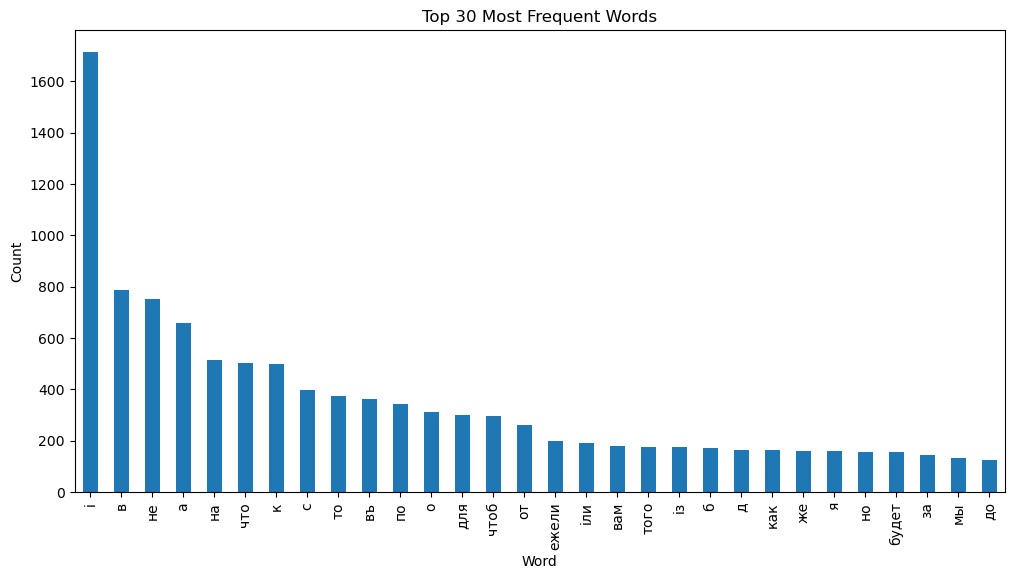

In [13]:
nword = 30
words.head(nword).plot(kind='bar', figsize=(12, 6))
plt.title(f'Top {nword} Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()